In [ ]:
## All Done by Brian J. Acquafredda, MBA, MS
## Below Common Python Packages Frequently used in Python for Simple Data Analysis & Visualizations
## LINKEDIN URL: www.linkedin.com/in/brianjacquafredda
## GITHUB URL: https://github.com/brianjacquafredda
## EMAIL:  brian.j.acquafredda.biz@gmail.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
## If I am using Google Colab their File Import Code is a lot easier than a direct path...
## from google.colab import files
## uploaded = files.upload()

In [2]:
## Path to sales_data.csv if using standard Python Platform like Jupyter Notebook...
datapath = r'C:\Users\brian\OneDrive\Desktop\DATA\sales_data.csv'

In [3]:
## Have it formatted in Pandas...
data = pd.read_csv(datapath)

In [4]:
## Basic View of Top of Data Table Loaded...
data.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2/3/2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,4/21/2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,9/21/2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,8/24/2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,3/24/2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
## Your Summary Statistics Unfiltered...
data.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [7]:
## Converting Sale_Date Column to make it more friendly with date formats for Visualizations...
data['Sale_Date'] = pd.to_datetime(data['Sale_Date'])

In [12]:
## This is to select only one category of product from the column Product_Category...
selected_category = 'Electronics'
data_filtered = data[data['Product_Category'] == selected_category]

In [15]:
## I want the Line Chart of Total Sales from a specific Time Frame, as multiple dates have Sales Amounts...
data_grouped = data_filtered.groupby(['Sale_Date', 'Product_Category'])['Sales_Amount'].sum().reset_index()

In [16]:
## I am formatting the 'Sales_Amount' Column to be numeric, as if you look at data.info() you can see the data type by default...
data_grouped['Sales_Amount'] = data_grouped['Sales_Amount'].astype(int)

In [17]:
## If I want to do in-between dates let's say I only want Year 2023 I need to create the following variables...
start_date = "2023-01-01"
end_date = "2023-12-31"

In [18]:
## This part of the code, I think create a formula to have data between the start date and the end data as above...
data_grouped = data_grouped[(data_grouped['Sale_Date'] >= start_date) & (data_grouped['Sale_Date'] <= end_date)]

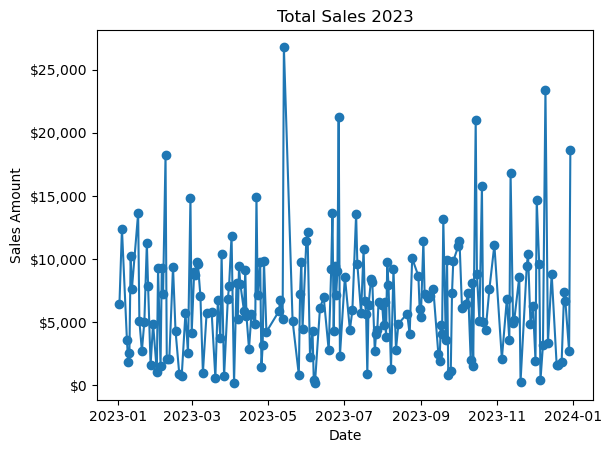

In [20]:
### Here I am creating a Line Chart in Matplotlib with the Filtered Product Category and Year of 2023 of Total Sales
plt.plot(data_grouped['Sale_Date'], data_grouped['Sales_Amount'], marker='o', linestyle='-')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Total Sales 2023')
plt.show()

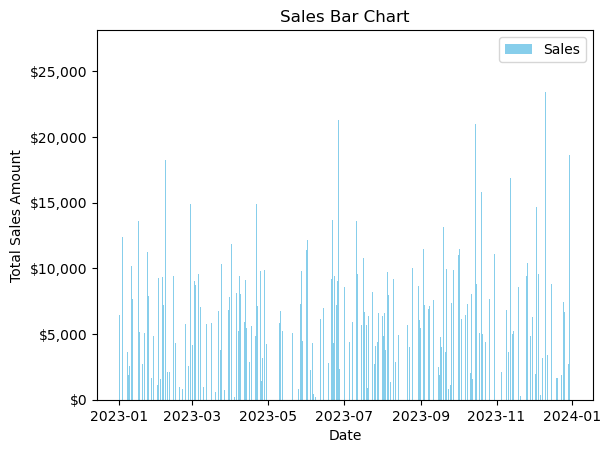

In [22]:
## Here is a Simple Bar Chart which only looked at one Measure Total Sales...
plt.bar(data_grouped['Sale_Date'], data_grouped['Sales_Amount'], color='skyblue', label='Sales')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${int(x):,}'))
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Sales Bar Chart')
plt.legend()
plt.show()

In [23]:
## Test Validation that the code filtered only by Product_Category & Quick Check on the Date Range...
data_grouped.head()

,Sale_Date,Product_Category,Sales_Amount
0,2023-01-02,Electronics,6452
1,2023-01-04,Electronics,12391
2,2023-01-08,Electronics,3613
3,2023-01-09,Electronics,1875
4,2023-01-10,Electronics,2548
